In [1]:
import tensorflow as tf 
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt 

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [4]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 6386 images belonging to 8 classes.


In [5]:

train_generator.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Early_blight': 5,
 'Tomato_Late_blight': 6,
 'Tomato_healthy': 7}

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_healthy']

In [7]:

count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.5781142  0.55850637 0.57419264]
  [0.51713616 0.49752828 0.5132146 ]
  [0.42180586 0.40219802 0.4178843 ]
  ...
  [0.5371341  0.5136047  0.529291  ]
  [0.53681684 0.5137255  0.5294118 ]
  [0.5363707  0.5137255  0.5294118 ]]

 [[0.56785303 0.5482452  0.56393147]
  [0.54524267 0.5256348  0.5413211 ]
  [0.4110986  0.39149076 0.40717703]
  ...
  [0.53336686 0.5137255  0.5294118 ]
  [0.5391101  0.5195023  0.53518856]
  [0.545356   0.52574813 0.5414344 ]]

 [[0.557592   0.53798413 0.5536704 ]
  [0.57334924 0.5537414  0.56942767]
  [0.40039137 0.38078353 0.3964698 ]
  ...
  [0.58740973 0.5678019  0.58348817]
  [0.5917198  0.5721119  0.58779824]
  [0.595735   0.5761272  0.59181345]]

 ...

 [[0.32500225 0.31715912 0.32892382]
  [0.33035588 0.32251275 0.33427745]
  [0.3357095  0.32786638 0.33963108]
  ...
  [0.36719888 0.36327732 0.38288516]
  [0.31857583 0.31456983 0.33417767]
  [0.361551   0.35370785 0.3733157 ]]

 [[0.35620534 0.3483622  0.3601269 ]
  [0.35843605 0.3505929  0.36235762]


In [8]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 910 images belonging to 8 classes.


In [9]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1831 images belonging to 8 classes.


In [10]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.59170586 0.54464704 0.5524902 ]
  [0.59553456 0.5484757  0.5563188 ]
  [0.744399   0.6973402  0.7051833 ]
  ...
  [0.64718825 0.5883647  0.6001294 ]
  [0.6423501  0.58352655 0.59529126]
  [0.5806405  0.52181697 0.5335817 ]]

 [[0.59410745 0.5470486  0.55489177]
  [0.66726404 0.6202052  0.62804836]
  [0.6244313  0.5773725  0.5852156 ]
  ...
  [0.6247149  0.5658914  0.5776561 ]
  [0.6033738  0.5445503  0.556315  ]
  [0.5402282  0.48140463 0.49316934]]

 [[0.6470613  0.60000247 0.6078456 ]
  [0.6676026  0.6205438  0.6283869 ]
  [0.59987164 0.5528128  0.56065595]
  ...
  [0.59360254 0.534779   0.5465437 ]
  [0.57582253 0.516999   0.5287637 ]
  [0.534033   0.47520947 0.48697418]]

 ...

 [[0.5884731  0.5374927  0.5649437 ]
  [0.6927487  0.64176834 0.6692193 ]
  [0.6190081  0.56802773 0.5954787 ]
  ...
  [0.5264129  0.46758935 0.47935405]
  [0.53284407 0.47402054 0.48578525]
  [0.5455067  0.48668313 0.49844787]]

 [[0.61599475 0.56501436 0.59246534]
  [0.70792985 0.6569494  0.68440044]


In [11]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 8

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [12]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [14]:

history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 122s 3s/step - loss: 2.0079 - accuracy: 0.2274 - val_loss: 1.9415 - val_accuracy: 0.2292
Epoch 2/20
47/47 [==============================] - 106s 2s/step - loss: 1.9468 - accuracy: 0.2241 - val_loss: 1.8551 - val_accuracy: 0.3229
Epoch 3/20
47/47 [==============================] - 106s 2s/step - loss: 1.7786 - accuracy: 0.3172 - val_loss: 1.7611 - val_accuracy: 0.3438
Epoch 4/20
47/47 [==============================] - 101s 2s/step - loss: 1.4285 - accuracy: 0.4801 - val_loss: 1.3827 - val_accuracy: 0.5052
Epoch 5/20
47/47 [==============================] - 98s 2s/step - loss: 1.1661 - accuracy: 0.5731 - val_loss: 1.1849 - val_accuracy: 0.5781
Epoch 6/20
47/47 [==============================] - 97s 2s/step - loss: 1.0257 - accuracy: 0.6057 - val_loss: 0.9393 - val_accuracy: 0.6198
Epoch 7/20
47/47 [==============================] - 102s 2s/step - loss: 0.9084 - accuracy: 0.6602 - val_loss: 0.9445 - val_accuracy: 0.6458
Epoch 8/20
47/4

In [15]:
scores = model.evaluate(test_generator)


58/58 [==============================] - 116s 2s/step - loss: 0.4269 - accuracy: 0.8531


In [16]:
scores

[0.4269397556781769, 0.8530857563018799]

In [17]:
history


In [18]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [19]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
type(history.history['loss'])


list

In [21]:
len(history.history['loss'])


20

In [22]:
history.history['loss'][:5] # show loss for first 5 epochs


[2.0079092979431152,
 1.9468380212783813,
 1.7786284685134888,
 1.428463101387024,
 1.1661492586135864]

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


In [24]:
val_acc


[0.2291666716337204,
 0.3229166567325592,
 0.34375,
 0.5052083134651184,
 0.578125,
 0.6197916865348816,
 0.6458333134651184,
 0.7395833134651184,
 0.7291666865348816,
 0.6770833134651184,
 0.7291666865348816,
 0.7708333134651184,
 0.8125,
 0.765625,
 0.8385416865348816,
 0.8333333134651184,
 0.78125,
 0.7604166865348816,
 0.78125,
 0.8541666865348816]

In [25]:
acc


[0.22739361226558685,
 0.22406914830207825,
 0.31715425848960876,
 0.480053186416626,
 0.5731382966041565,
 0.6057180762290955,
 0.6602393388748169,
 0.7047872543334961,
 0.708776593208313,
 0.7473404407501221,
 0.7280585169792175,
 0.7845637798309326,
 0.779920220375061,
 0.8264627456665039,
 0.800000011920929,
 0.8221476674079895,
 0.7932180762290955,
 0.8417553305625916,
 0.8311170339584351,
 0.823803186416626]

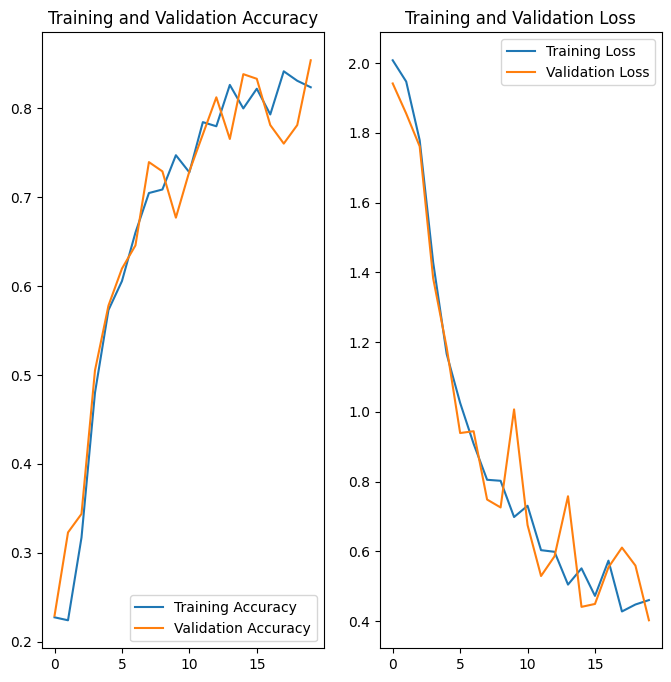

In [26]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Pepper__bell___Bacterial_spot
predicted label: Pepper__bell___Bacterial_spot


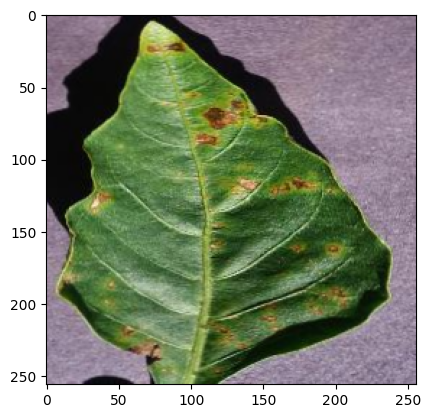

In [27]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [28]:

# function for inference

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

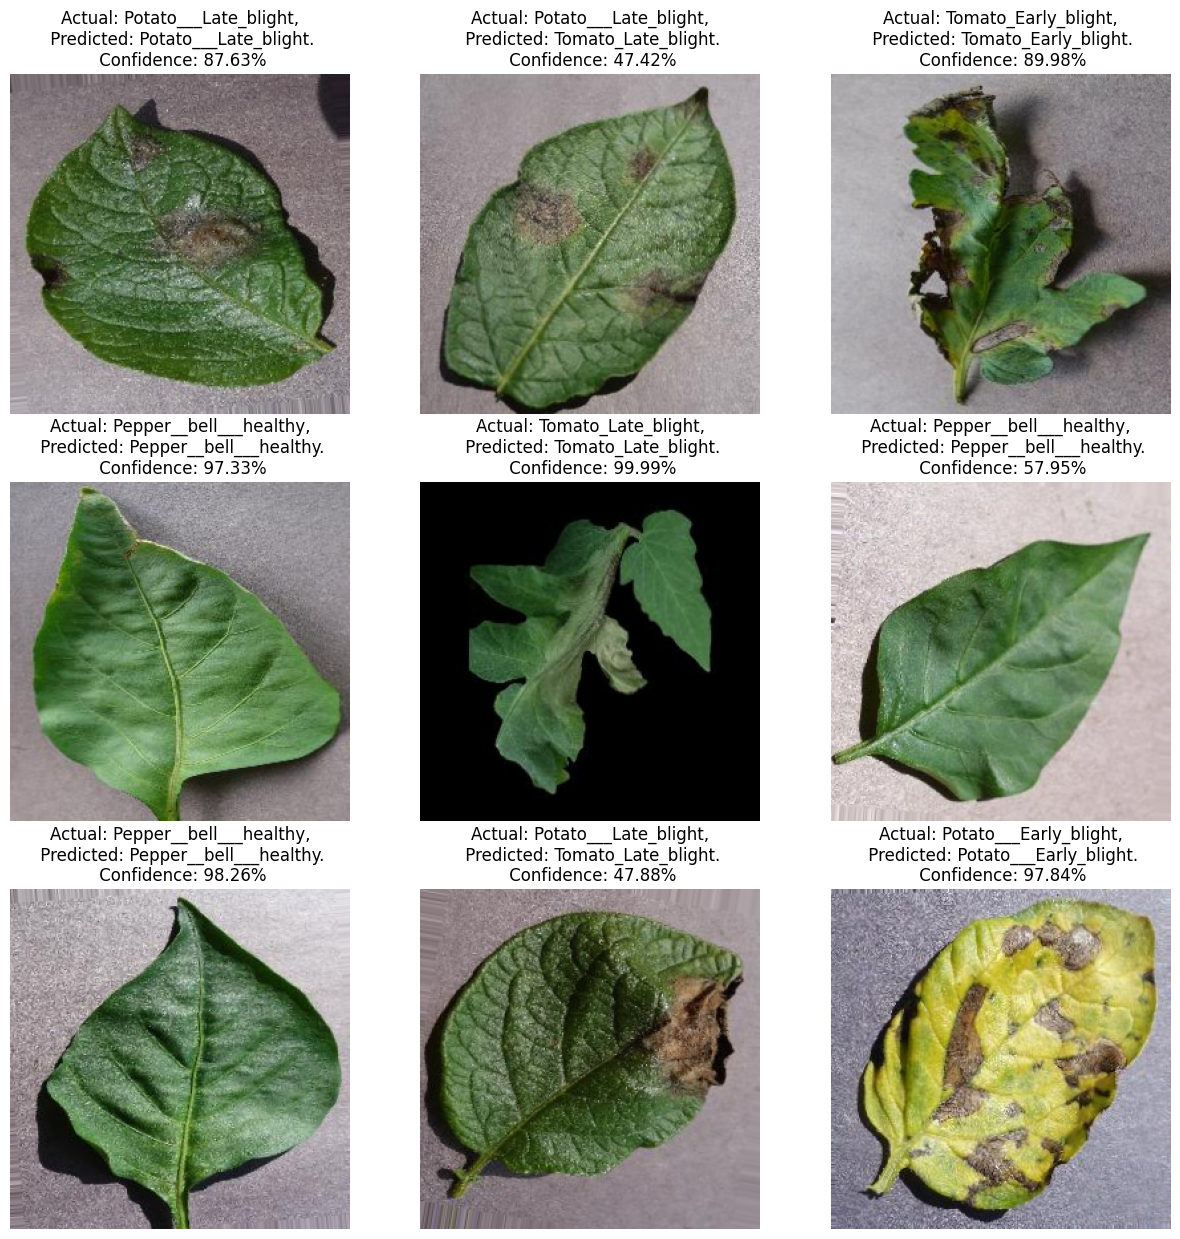

In [29]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [30]:
model.save("../plant_disease.h5")
